In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image, display
%matplotlib inline

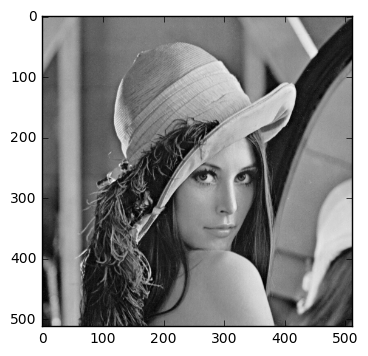

In [2]:
img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

# 원래 사진과 가우시안 블러된 사진

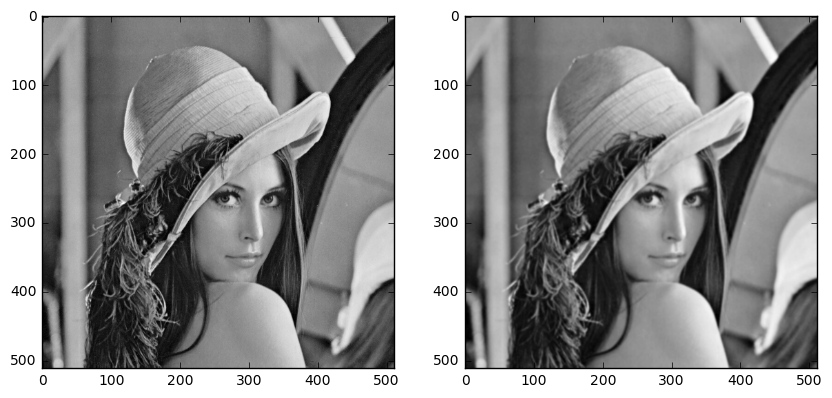

In [3]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
blur_img = cv2.GaussianBlur(img, ksize=(11,11), sigmaX=1)
plt.imshow(blur_img, cmap='gray')

In [4]:
Gaussian_1Dfilter = cv2.getGaussianKernel(ksize=11, sigma=1)
Gaussian_2Dfilter = Gaussian_1Dfilter * Gaussian_1Dfilter.T

/Users/Joohong/anaconda/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/Users/Joohong/anaconda/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


0.935618932319
0.935600284887


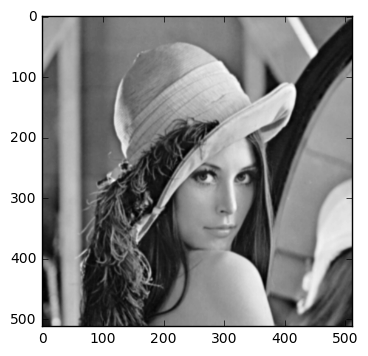

In [5]:
blur = cv2.filter2D(src=img, kernel=Gaussian_2Dfilter, ddepth=-1)
plt.imshow(blur, cmap='gray')
from skimage.measure import structural_similarity as ssim
print(ssim(img, blur))
print(ssim(img, blur_img))

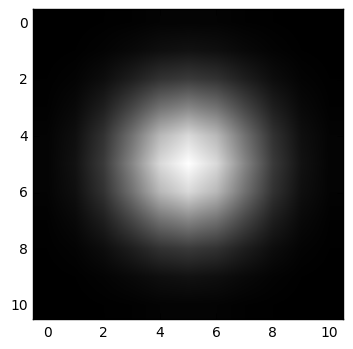

In [6]:
trans_gf = np.fft.fft2(Gaussian_2Dfilter)
trans_gf = np.fft.fftshift(trans_gf)
trans_gf = abs(trans_gf)
plt.imshow(trans_gf, cmap='gray')

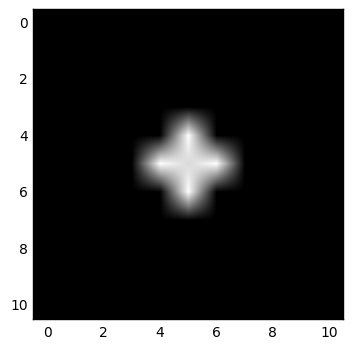

In [16]:
threshold = 0.8
reciprocal = np.array(trans_gf)
for i in range(11):
    for j in range(11):
        if trans_gf[i][j] <  threshold:
            reciprocal[i][j] = 0
        else:
            reciprocal[i][j] = 1. / trans_gf[i][j]
plt.imshow(reciprocal, cmap='gray')

[[ 0.0290747   0.02314724  0.01317424  0.00232207  0.00596379  0.00905264
   0.00596379  0.00232207  0.01317424  0.02314724  0.0290747 ]
 [ 0.02314724  0.01721978  0.00724678  0.00360539  0.01189125  0.0149801
   0.01189125  0.00360539  0.00724678  0.01721978  0.02314724]
 [ 0.01317424  0.00724678  0.00272621  0.01357838  0.02186424  0.02495309
   0.02186424  0.01357838  0.00272621  0.00724678  0.01317424]
 [ 0.00232207  0.00360539  0.01357838  0.02443055  0.03271641  0.03580526
   0.03271641  0.02443055  0.01357838  0.00360539  0.00232207]
 [ 0.00596379  0.01189125  0.02186424  0.03271641  0.04100227  0.04409112
   0.04100227  0.03271641  0.02186424  0.01189125  0.00596379]
 [ 0.00905264  0.0149801   0.02495309  0.03580526  0.04409112  0.04717997
   0.04409112  0.03580526  0.02495309  0.0149801   0.00905264]
 [ 0.00596379  0.01189125  0.02186424  0.03271641  0.04100227  0.04409112
   0.04100227  0.03271641  0.02186424  0.01189125  0.00596379]
 [ 0.00232207  0.00360539  0.01357838  0.0

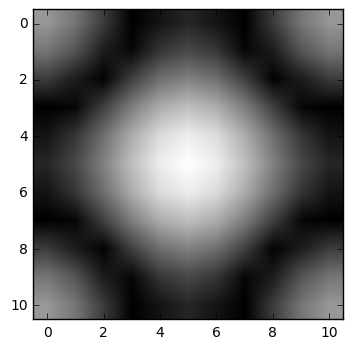

In [18]:
inv_filter = abs(np.fft.ifft2(reciprocal))
inv_filter = np.fft.fftshift(inv_filter)
print(inv_filter)
plt.imshow(inv_filter, cmap='gray')

[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [124 124 125 ..., 220 222 223]
 [124 124 125 ..., 223 226 227]
 [124 124 125 ..., 225 227 228]]


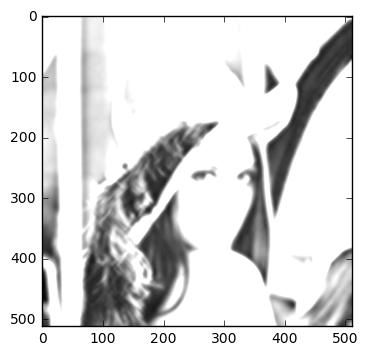

In [19]:
restored_img = cv2.filter2D(src=blur_img, kernel=inv_filter, ddepth=-1)
print(restored_img)
plt.imshow(restored_img, cmap='gray')

In [14]:
from skimage.measure import structural_similarity as ssim
print(ssim(img, restored_img))

0.590282473841


/Users/Joohong/anaconda/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
